# 🏡 Finding Factors Influencing Vancouver Airbnb Price

- Rachel Kim
- C***​
- P***
- C***

# **1. Introduction**

## 1-1. Project Overview  

This analysis aims to extract insights from public data provided by Airbnb, which is considered the largest hotel company today, even though it does not own any hotels!


- The startup, founded in 2008, connects people who want to travel and stay with hosts who want to rent their properties in a practical way through an innovative platform. This new business model challenges traditional hotel chains, so much so that, in 2018, Airbnb had already hosted more than 300 million people around the world


- The data shown here was taken from the Inside Airbnb portal. https://insideairbnb.com/get-the-data/


**About the city**
- Vancouver is one of the largest cities in Canada, with a population of approximately 2.6 million in its metropolitan area. Established in 1886, the coastal city in the province of British Columbia is modern, featuring a stunning skyline framed by mountains and the ocean. Despite its modern infrastructure, Vancouver is home to charming neighborhoods, such as Gastown, where cobblestone streets and heritage buildings blend seamlessly with contemporary urban life.

## 2-2. Dataset Description  

The dataset contains information about summer listings for accommodations on Airbnb platform. Here is a summary of its structure and key details:

**Dataset Overview**
- Rows: 18,797 entries
- Columns: 20 columns

# **2. Data Loading and Exploration**

## 2-1. Loading the Dataset

In [ ]:
# Loading the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the dataset
df = pd.read_csv('Summer-listings-Summary.csv')

## 2-2. Basic Statistics and Distribution Check

In [ ]:
# checking the dataset
df.head()

,month,year,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,June,2024,13188.0,Garden level studio in ideal loc.,51466,Emma,NaN,Riley Park,49.247730,-123.105090,Entire home/apt,160.0,2,304,2024-06-12,1.74,3,281,44,24-157388
1,June,2024,13358.0,Designer Downtown Vancouver suite,52116,Lynn,NaN,Downtown,49.281174,-123.125931,Entire home/apt,261.0,2,518,2024-05-30,3.04,1,102,60,24-159219
2,June,2024,13490.0,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.256220,-123.066070,Entire home/apt,225.0,30,105,2024-06-01,0.66,1,244,7,NaN
3,June,2024,14267.0,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.249220,-123.081390,Entire home/apt,180.0,30,33,2021-07-14,0.20,1,56,0,21-156500
4,June,2024,16254.0,Close to PNE/Hastings Park Garden level suite,63238,Jason,NaN,Hastings-Sunrise,49.277210,-123.040860,Entire home/apt,800.0,5,7,2022-07-30,0.10,1,0,0,NaN


In [ ]:
# data shape
df.shape

(18797, 20)

In [ ]:
# checking the basic statistic of dataset
df.describe()

,year,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,18797.0,1.879700e+04,1.879700e+04,0.0,18797.000000,18797.000000,14923.000000,18797.000000,18797.000000,15820.000000,18797.000000,18797.000000,18797.000000
mean,2024.0,5.214137e+17,2.027872e+08,NaN,49.261961,-123.111894,268.977216,20.332979,44.024578,1.829317,6.919136,131.519445,13.690908
std,0.0,4.814638e+17,1.913654e+08,NaN,0.021290,0.039081,758.485355,36.756239,76.672167,1.911266,19.636228,116.577872,20.121802
min,2024.0,1.318800e+04,6.033000e+03,NaN,49.202960,-123.217730,14.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2024.0,3.464772e+07,2.762392e+07,NaN,49.249220,-123.131293,130.000000,2.000000,2.000000,0.310000,1.000000,24.000000,0.000000
50%,2024.0,6.700000e+17,1.364344e+08,NaN,49.268020,-123.114320,198.000000,3.000000,13.000000,1.060000,1.000000,103.000000,4.000000
75%,2024.0,9.700000e+17,3.742131e+08,NaN,49.278907,-123.088380,300.000000,30.000000,54.000000,2.930000,3.000000,229.000000,21.000000
max,2024.0,1.220000e+18,5.950870e+08,NaN,49.294360,-123.023680,57221.000000,1125.000000,1006.000000,14.390000,132.000000,365.000000,145.000000


# **3. Data Preprocessing**

## 3-1. Dropping values and handling missing values

In [ ]:
# checking the columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18797 entries, 0 to 18796
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   month                           18797 non-null  object 
 1   year                            18797 non-null  int64  
 2   id                              18797 non-null  float64
 3   name                            18797 non-null  object 
 4   host_id                         18797 non-null  int64  
 5   host_name                       18797 non-null  object 
 6   neighbourhood_group             0 non-null      float64
 7   neighbourhood                   18797 non-null  object 
 8   latitude                        18797 non-null  float64
 9   longitude                       18797 non-null  float64
 10  room_type                       18797 non-null  object 
 11  price                           14923 non-null  float64
 12  minimum_nights                  

In [ ]:
# Drop the data that are not of interest and/or causing privacy issues
# year : All values has 2024
# id, name, license : not of interest
# last_review : the information already has by reviews_per_month
# neighbourhood_group : All has NaN values

df.drop(['year','id', 'host_id', 'host_name', 'name', 'license', 'last_review', 'neighbourhood_group'], axis=1, inplace=True)
df

,month,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,June,Riley Park,49.247730,-123.105090,Entire home/apt,160.0,2,304,1.74,3,281,44
1,June,Downtown,49.281174,-123.125931,Entire home/apt,261.0,2,518,3.04,1,102,60
2,June,Kensington-Cedar Cottage,49.256220,-123.066070,Entire home/apt,225.0,30,105,0.66,1,244,7
3,June,Kensington-Cedar Cottage,49.249220,-123.081390,Entire home/apt,180.0,30,33,0.20,1,56,0
4,June,Hastings-Sunrise,49.277210,-123.040860,Entire home/apt,800.0,5,7,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18792,August,Hastings-Sunrise,49.266390,-123.046240,Entire home/apt,169.0,1,0,NaN,2,360,0
18793,August,Downtown,49.278419,-123.121946,Entire home/apt,128.0,4,0,NaN,1,337,0
18794,August,West End,49.286412,-123.124442,Entire home/apt,299.0,1,0,NaN,4,322,0
18795,August,Downtown Eastside,49.283027,-123.107914,Entire home/apt,440.0,2,0,NaN,1,170,0


In [ ]:
# checking the NaN values
df.isna().sum()

month                                0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                             3874
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2977
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

**'price' and 'reviews_per_month' have some null values.**

In [ ]:
# Drop rows with missing 'price' values (target variable)
df_cleaned = df.dropna(subset=['price']).copy()

In [ ]:
# Fill missing values in 'reviews_per_month' with 0 (assumes no reviews for missing values)
df_cleaned['reviews_per_month'] = df_cleaned['reviews_per_month'].fillna(0)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14923 entries, 0 to 18796
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   month                           14923 non-null  object 
 1   neighbourhood                   14923 non-null  object 
 2   latitude                        14923 non-null  float64
 3   longitude                       14923 non-null  float64
 4   room_type                       14923 non-null  object 
 5   price                           14923 non-null  float64
 6   minimum_nights                  14923 non-null  int64  
 7   number_of_reviews               14923 non-null  int64  
 8   reviews_per_month               14923 non-null  float64
 9   calculated_host_listings_count  14923 non-null  int64  
 10  availability_365                14923 non-null  int64  
 11  number_of_reviews_ltm           14923 non-null  int64  
dtypes: float64(4), int64(5), object(3)
me

## 3-2. Outlier Removal

In [ ]:
# checking the values by describe()
round(df_cleaned.describe(),2)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,14923.00,14923.00,14923.00,14923.00,14923.00,14923.00,14923.00,14923.00,14923.0
mean,49.26,-123.11,268.98,19.14,49.44,1.79,7.64,158.59,16.3
std,0.02,0.04,758.49,30.92,82.31,1.97,21.47,110.39,21.3
min,49.20,-123.22,14.00,1.00,0.00,0.00,1.00,0.00,0.0
25%,49.25,-123.13,130.00,2.00,2.00,0.21,1.00,61.00,1.0
50%,49.27,-123.11,198.00,3.00,16.00,1.00,1.00,139.00,6.0
75%,49.28,-123.09,300.00,30.00,63.00,2.97,4.00,255.00,26.0
max,49.29,-123.02,57221.00,399.00,1006.00,14.39,132.00,365.00,145.0


**1. Price**  
The maximum value is 57,221, whereas the Q3 value is 300.
For the price column, cases where the price significantly exceeds the typical accommodation price range may suggest the following possibilities:  
- The host made an input error and recorded an excessively high price.  
- The accommodation is not aimed at the general public but is a luxury property or intended for special events.  

These are considered outliers, and the analysis proceeds by retaining only typical prices.  

**2. Minimum Nights**  
The minimum_nights column represents the minimum stay duration set by the host.  
Extremely high values, such as 365 days, effectively render the property unbookable.  
This might indicate that the host is trying to block bookings intentionally or that the property is being used for long-term residency rather than short-term accommodation.  

**3. number_of_reviews**   
Accommodations with 1,006 reviews are likely rare cases in the dataset (probably within the top 1% or higher).
An extremely high number of reviews can distort statistical values such as mean and variance, reducing the reliability of analysis results.
If the number of reviews for a specific property significantly deviates from 90% of the overall dataset, the property does not represent general market trends and is treated as an outlier.

**4. availability_365**  
Extreme values such as 0 or 365 may distort the model's interpretation.

- Value of 0: This may indicate that the property is deactivated, and its inclusion in the analysis should be reviewed.
- Value of 365: While it suggests that the property is available every day of the year, this may not be realistic. Setting an upper limit (e.g., 300 days) is recommended.

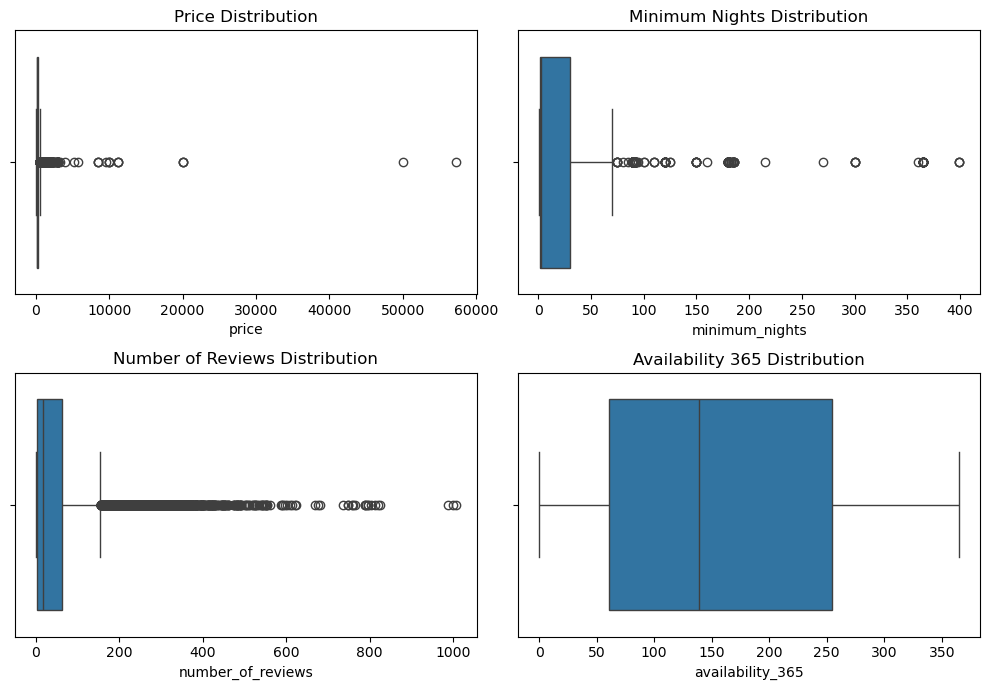

In [ ]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# 1. Price distribution
sns.boxplot(ax=axes[0, 0], x=df_cleaned['price'])
axes[0, 0].set_title('Price Distribution')

# 2. Minimum nights distribution
sns.boxplot(ax=axes[0, 1], x=df_cleaned['minimum_nights'])
axes[0, 1].set_title('Minimum Nights Distribution')

# 3. Number of reviews distribution
sns.boxplot(ax=axes[1, 0], x=df_cleaned['number_of_reviews'])
axes[1, 0].set_title('Number of Reviews Distribution')

# 4. Availability 365 distribution
sns.boxplot(ax=axes[1, 1], x=df_cleaned['availability_365'])
axes[1, 1].set_title('Availability 365 Distribution')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
# Interquartile Range (IQR)
# Q1 - 1.5 * IQR: The lower boundary is calculated as Q1 - 1.5 X IQR
# Data smaller than this value is considered an outlier (abnormally small value).
# Q3 + 1.5 * IQR : The upper boundry is cacluated as Q3 + 1.5 X IQR
# Data larger than this value is considered an outlier (abnormally large value).
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned, lower_bound, upper_bound

# Handling outliers
# 1. Price
df_cleaned, price_lower, price_upper = remove_outliers_iqr(df_cleaned, 'price')

# 2. Minimum nights
# equal or under 30
df_cleaned = df_cleaned[df_cleaned['minimum_nights'] <= 30]

# 3. Number of reviews
df_cleaned, reviews_lower, reviews_upper = remove_outliers_iqr(df_cleaned, 'number_of_reviews')

# 4. Availability 365
# under 300 days
df_cleaned = df_cleaned[df_cleaned['availability_365'] <= 300]

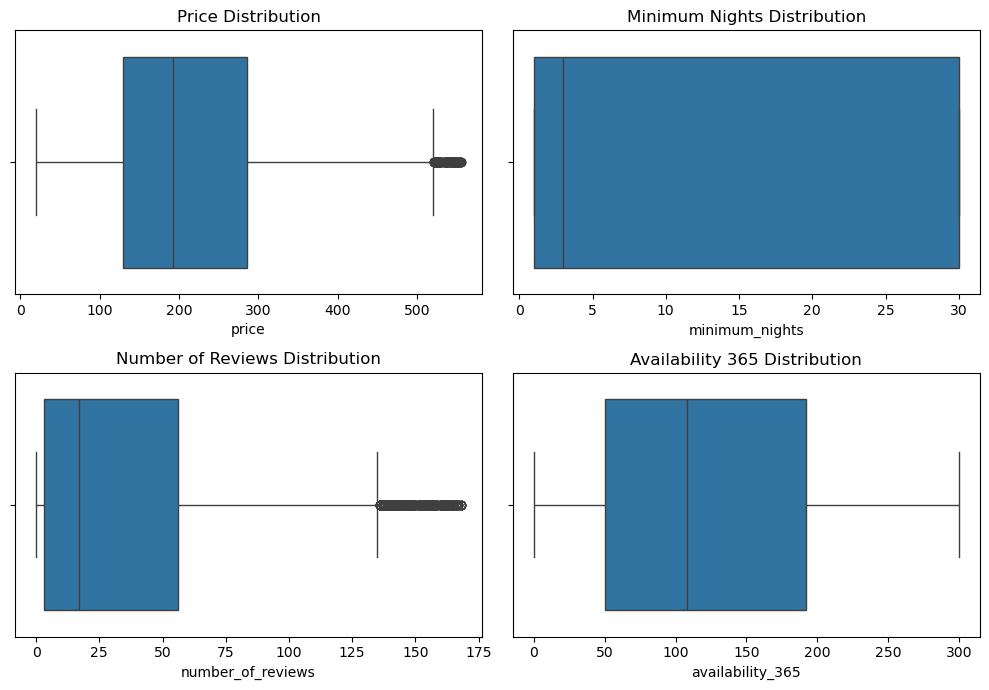

In [ ]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Price
sns.boxplot(ax=axes[0, 0], x=df_cleaned['price'])
axes[0, 0].set_title('Price Distribution')

# Minimum Nights
sns.boxplot(ax=axes[0, 1], x=df_cleaned['minimum_nights'])
axes[0, 1].set_title('Minimum Nights Distribution')

# Number of Reviews
sns.boxplot(ax=axes[1, 0], x=df_cleaned['number_of_reviews'])
axes[1, 0].set_title('Number of Reviews Distribution')

# Availability 365
sns.boxplot(ax=axes[1, 1], x=df_cleaned['availability_365'])
axes[1, 1].set_title('Availability 365 Distribution')

# arrange layout
plt.tight_layout()
plt.show()

In [ ]:
round(df_cleaned.describe(),2)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9986.00,9986.00,9986.00,9986.00,9986.00,9986.00,9986.00,9986.00,9986.00
mean,49.26,-123.11,216.90,11.35,35.24,1.91,7.69,123.58,16.25
std,0.02,0.04,114.02,13.15,41.21,1.97,22.56,86.37,19.40
min,49.20,-123.22,20.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,49.25,-123.13,130.00,1.00,3.00,0.29,1.00,50.00,1.00
50%,49.27,-123.11,192.00,3.00,17.00,1.27,1.00,108.00,7.00
75%,49.28,-123.08,286.00,30.00,56.00,3.06,3.00,192.00,26.00
max,49.29,-123.02,555.00,30.00,168.00,14.39,132.00,300.00,142.00


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 2 to 18796
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   month                           9986 non-null   object 
 1   neighbourhood                   9986 non-null   object 
 2   latitude                        9986 non-null   float64
 3   longitude                       9986 non-null   float64
 4   room_type                       9986 non-null   object 
 5   price                           9986 non-null   float64
 6   minimum_nights                  9986 non-null   int64  
 7   number_of_reviews               9986 non-null   int64  
 8   reviews_per_month               9986 non-null   float64
 9   calculated_host_listings_count  9986 non-null   int64  
 10  availability_365                9986 non-null   int64  
 11  number_of_reviews_ltm           9986 non-null   int64  
dtypes: float64(4), int64(5), object(3)
mem

## 3-3. Log Transformation and Data Encoding

**Change categorical values to number in month column**

In [ ]:
# chainging the values from object to number in 'month' column
df_cleaned['month'] = df_cleaned['month'].replace({'June': 6, 'July': 7, 'August': 8}).astype(int)
print(df_cleaned['month'].unique())

[6 7 8]


C:\Users\bpark\AppData\Local\Temp\ipykernel_20120\1229343732.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['month'] = df_cleaned['month'].replace({'June': 6, 'July': 7, 'August': 8}).astype(int)


**Change to log values in price column**

In [ ]:
# Log transformation 'price' column
df_cleaned['log_price'] = np.log1p(df_cleaned['price'])

# Drop the original 'price' column
df_cleaned = df_cleaned.drop(['price'], axis=1)

# **4. Data Visualization**

## 4-1) Regional Distribution Visualization

In [ ]:
# check the number of unique values in neighbourhood
df_cleaned['neighbourhood'].nunique()

23

In [ ]:
df_cleaned['neighbourhood'].value_counts()

neighbourhood
Downtown                    2205
Kitsilano                    778
Downtown Eastside            655
Mount Pleasant               643
Kensington-Cedar Cottage     634
Renfrew-Collingwood          484
Hastings-Sunrise             481
West End                     449
Riley Park                   422
Dunbar Southlands            413
Grandview-Woodland           365
Sunset                       361
Marpole                      312
Fairview                     303
Victoria-Fraserview          272
West Point Grey              240
Arbutus Ridge                223
Shaughnessy                  165
Oakridge                     154
Killarney                    154
Kerrisdale                   139
South Cambie                  88
Strathcona                    46
Name: count, dtype: int64

In [ ]:
!pip install folium
import folium
from folium.plugins import HeatMap
m=folium.Map([49.265096	,-123.109460],zoom_start=11.5)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

neighbourhood
Downtown    4309
Western     1754
Estern      1587
Southern    1561
Other        775
Name: count, dtype: int64


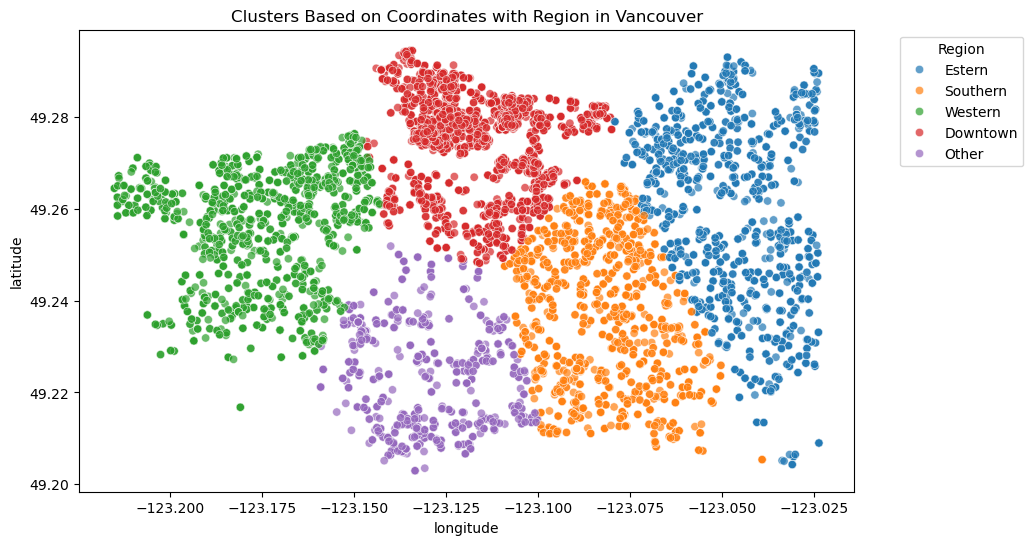

In [ ]:
# Importing the KMeans algorithm for clustering
from sklearn.cluster import KMeans

# Extracting latitude and longitude columns to use as coordinates for clustering
coords = df_cleaned[['latitude', 'longitude']]

# Applying KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42).fit(coords)
# Adding the resulting cluster labels to the DataFrame
df_cleaned['cluster'] = kmeans.labels_

# Mapping cluster labels to region names
cluster_mapping = {
    0: 'Western',
    1: 'Downtown',
    2: 'Other',
    3: 'Southern',
    4: 'Estern'
}

# Creating a new column 'neighbourhood' with mapped region names based on cluster labels
df_cleaned['neighbourhood'] = df_cleaned['cluster'].map(cluster_mapping)
print(df_cleaned['neighbourhood'].value_counts())

# Plotting the clusters on a scatterplot with regions differentiated by color
plt.figure(figsize=(10, 6))

# Use the 'neighbourhood' column as the hue to display region names.
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood', data=df_cleaned, palette='tab10', alpha=0.7)

plt.title("Clusters Based on Coordinates with Region in Vancouver")
# Adjusting the legend to appear outside the plot for better visibility
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

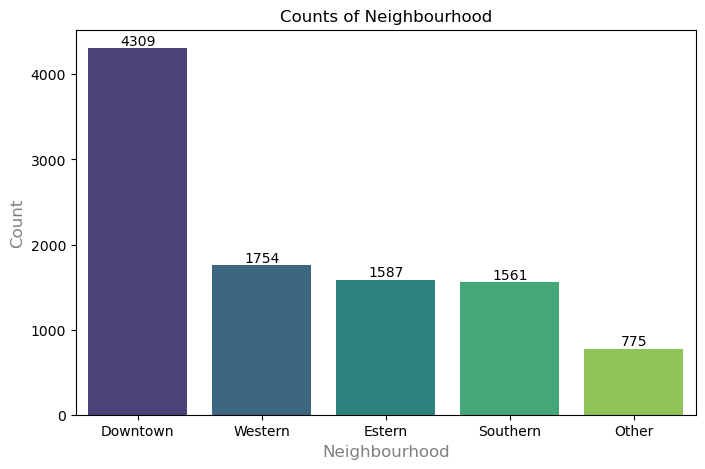

In [ ]:
neighbourhood_counts = df_cleaned['neighbourhood'].value_counts()
colors = sns.color_palette("viridis", len(neighbourhood_counts))

# bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    x=neighbourhood_counts.index,
    y=neighbourhood_counts.values,
    palette=colors, hue=neighbourhood_counts.index
)

plt.title('Counts of Neighbourhood')
plt.xlabel('Neighbourhood', fontsize=12, color='grey')
plt.ylabel('Count', fontsize=12, color='grey')
plt.xticks(fontsize=10)

# Add data values on top of the bars
for i in barplot.containers:
    barplot.bar_label(i, fmt='%d', label_type='edge', fontsize=10)

plt.show()

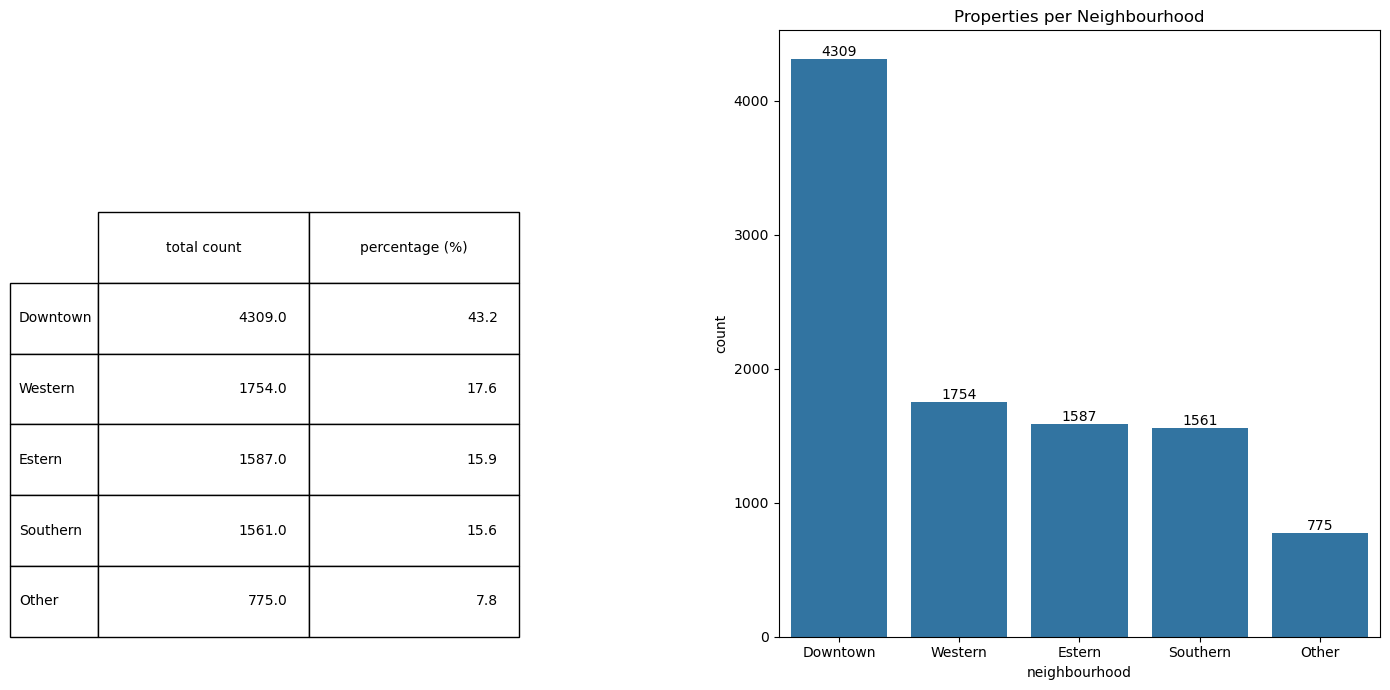

In [ ]:
# Create the DataFrame neighbourhood_counts with total count and percentage
neighbourhood_counts = pd.DataFrame(data=df_cleaned['neighbourhood'].value_counts())
# print(neighbourhood_counts.head(10))  # Display the top 10 neighborhoods

neighbourhood_counts.columns = ['total count']
neighbourhood_counts['percentage (%)'] = round(df_cleaned['neighbourhood'].value_counts(normalize=True) * 100, 1)

# Sort the DataFrame by 'total_count' in descending order
neighbourhood_counts = neighbourhood_counts.sort_values(by='total count', ascending=False)

# Create the figure for the table and count plot
fig = plt.figure(figsize=(14, 7))
# Subplot 1: Table of neighborhood counts and percentages
ax1 = fig.add_subplot(121)
ax1.axis('off')
bbox = [0, 0, 0.7, 0.7]
ax1.table(cellText=neighbourhood_counts.values, rowLabels=neighbourhood_counts.index, colLabels=neighbourhood_counts.columns, bbox=bbox)

# Subplot 2: Countplot of listings per neighborhood
ax2 = fig.add_subplot(122)
sns.countplot(x='neighbourhood', data=df_cleaned, order=neighbourhood_counts.index)  # Sort neighborhoods as per neighbourhood_counts

# Add labels on top of bars
ax2.bar_label(ax2.containers[0])

# Set the title
plt.title('Properties per Neighbourhood')

# Display the plot
plt.tight_layout()
plt.show()


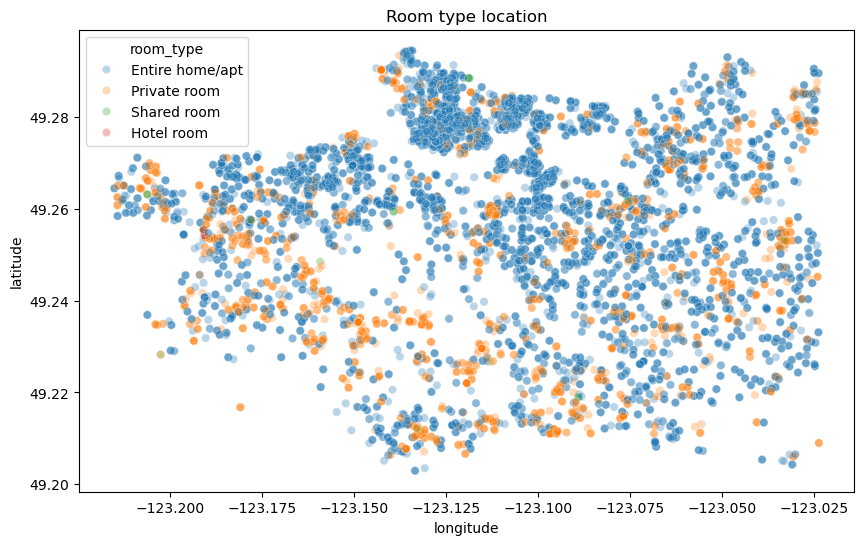

In [ ]:
# Visual map of Room type Location
title = 'Room type location'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=df_cleaned, alpha=0.3).set_title(title)
plt.show()

## 4-2) Feature Correlation Analysis

In [ ]:
print(df_cleaned['neighbourhood'].value_counts())
print(df_cleaned['cluster'].value_counts())

neighbourhood
Downtown    4309
Western     1754
Estern      1587
Southern    1561
Other        775
Name: count, dtype: int64
cluster
1    4309
0    1754
4    1587
3    1561
2     775
Name: count, dtype: int64


In [ ]:
# cluster = neighbourhood, so drop the cluster column
df_cleaned = df_cleaned.drop(['cluster'], axis = 1)

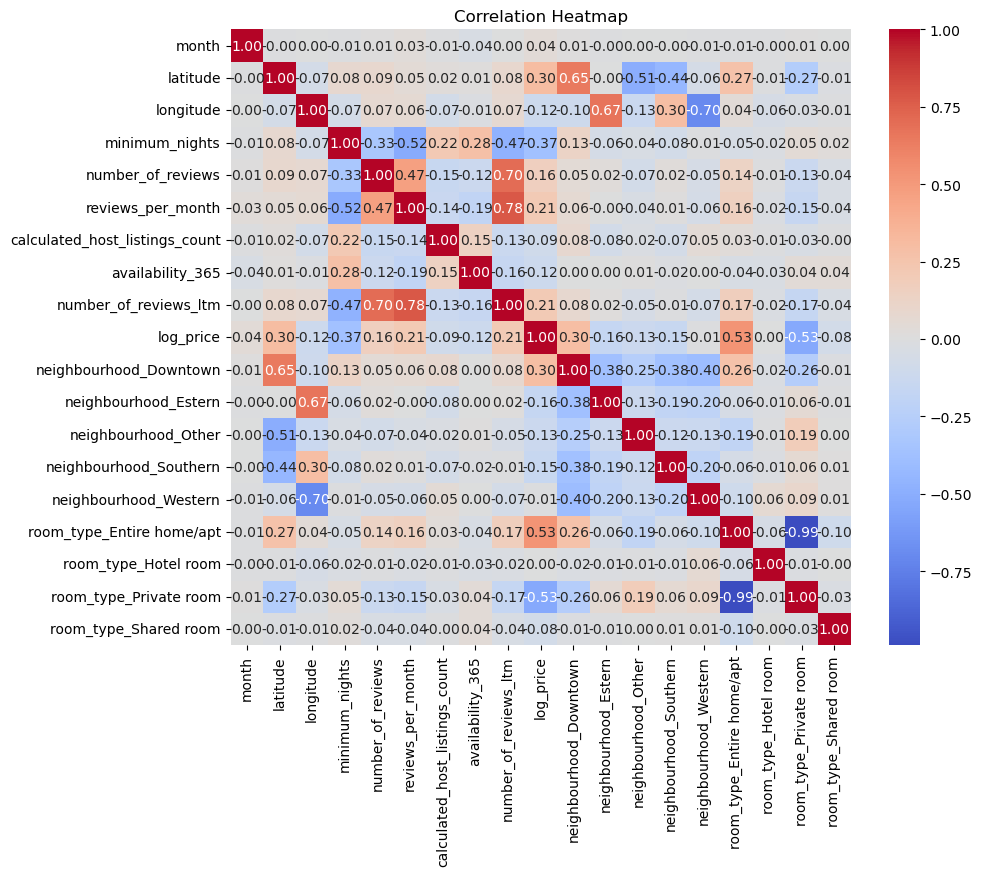

In [ ]:
# creating dummies value with categorical valeus for checking the correlation
df_corr = pd.get_dummies(df_cleaned, columns=['neighbourhood', 'room_type']).astype(float)

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# **5. Feature Selection**

## 5-1) Correlation and Importance Analysis

**Correlation Between Target Variable (log_price) and Key Variables**  

- room_type_Entire home/apt (0.53): Entire home/apt provides independent spaces, which positively impacts the price.
- room_type_Private room (-0.53): Private rooms are generally less expensive than entire homes/apartments, showing a negative correlation with price.
- room_type_Shared room (-0.55): Shared rooms are the most affordable accommodation type, displaying a strong negative correlation with price.

**Correlations Between Variables**

- number_of_reviews and reviews_per_month (0.78): Properties with more reviews also tend to have higher monthly review counts, which is an intuitive relationship. The two variables have a very high correlation, which could potentially cause multicollinearity.
- latitude and longitude (-0.67): Latitude and longitude exhibit a strong negative correlation, representing geographical characteristics of certain regions.

## 5-2) Explanation of Selected Features

In [ ]:
# creating dummies values
df_dummies = pd.get_dummies(df_cleaned, columns=['neighbourhood', 'room_type']).astype(float)

# drop each 1 column in neighbourhood and room_type
df_dummies = df_dummies.drop(['room_type_Hotel room','neighbourhood_Other'], axis=1)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9986 entries, 2 to 18796
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   month                           9986 non-null   float64
 1   latitude                        9986 non-null   float64
 2   longitude                       9986 non-null   float64
 3   minimum_nights                  9986 non-null   float64
 4   number_of_reviews               9986 non-null   float64
 5   reviews_per_month               9986 non-null   float64
 6   calculated_host_listings_count  9986 non-null   float64
 7   availability_365                9986 non-null   float64
 8   number_of_reviews_ltm           9986 non-null   float64
 9   log_price                       9986 non-null   float64
 10  neighbourhood_Downtown          9986 non-null   float64
 11  neighbourhood_Estern            9986 non-null   float64
 12  neighbourhood_Southern          9986 n

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking the multicollinearity (VIF)
X = df_dummies.drop(['log_price'], axis=1)  # except target variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                           feature           VIF
0                            month  7.290992e+01
1                         latitude  1.361362e+07
2                        longitude  1.358539e+07
3                   minimum_nights  2.716755e+00
4                number_of_reviews  3.615499e+00
5                reviews_per_month  5.622826e+00
6   calculated_host_listings_count  1.209420e+00
7                 availability_365  3.373726e+00
8            number_of_reviews_ltm  7.023589e+00
9           neighbourhood_Downtown  1.501398e+01
10            neighbourhood_Estern  7.331636e+00
11          neighbourhood_Southern  4.037098e+00
12           neighbourhood_Western  3.582764e+00
13       room_type_Entire home/apt  9.965111e+02
14          room_type_Private room  2.581254e+02
15           room_type_Shared room  4.149668e+00


In [ ]:
# removing not interested or containing duplicated information features
X = df_dummies.drop(['latitude', 'number_of_reviews', 'month'], axis=1)

# recalculating the VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                           feature          VIF
0                        longitude  1440.331644
1                   minimum_nights     3.335816
2                reviews_per_month     5.431716
3   calculated_host_listings_count     1.209297
4                 availability_365     3.366538
5            number_of_reviews_ltm     4.433468
6                        log_price   176.231072
7           neighbourhood_Downtown     7.306273
8             neighbourhood_Estern     3.107112
9           neighbourhood_Southern     3.064577
10           neighbourhood_Western     3.342989
11       room_type_Entire home/apt   996.315952
12          room_type_Private room   258.193215
13           room_type_Shared room     4.153101


In [ ]:
# additional removing the features
X = X.drop(['longitude', 'number_of_reviews_ltm'], axis=1)

# recalculating the VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                           feature         VIF
0                   minimum_nights    3.210731
1                reviews_per_month    2.828269
2   calculated_host_listings_count    1.207283
3                 availability_365    3.365627
4                        log_price  154.942732
5           neighbourhood_Downtown    7.284322
6             neighbourhood_Estern    3.077430
7           neighbourhood_Southern    3.039227
8            neighbourhood_Western    3.317478
9        room_type_Entire home/apt  146.922879
10          room_type_Private room   30.515145
11           room_type_Shared room    1.339885


**The VIFs are still high in some features. But theese columns are important to predict price in our prediction, we didn't drop the column.**

# **6. Regression Model Development**

## 6-1) Data Splitting (Train/Test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

# Data splitting
y = df_cleaned['log_price']
X = df_dummies.drop(['log_price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6-2) Model Training and Evaluation (Comparison of Linear Regression, Lasso, Ridge, etc.)

In [ ]:
# Model lists
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Results by models
results = []

for name, model in models.items():
    # Model training
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Evaluation
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    # Saving the results
    results.append({
        "Model": name,
        "R² Score": r2,
        "RMSE": rmse
    })

results_df = pd.DataFrame(results)
print(results_df)

               Model  R² Score      RMSE
0  Linear Regression  0.471623  0.398035
1   Ridge Regression  0.469449  0.398853
2   Lasso Regression  0.211207  0.486330
3         ElasticNet  0.360204  0.437996
4      Random Forest  0.737938  0.280318


**Random Forest** handles nonlinear relationships well and achieved the best performance in both R² Score and RMSE.

R² Score: 0.7379 → Explains approximately 74% of the variability in the target variable (log_price).  
RMSE: 0.2803 → Indicates the smallest average difference between predicted and actual values.

## 6-3) Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Setting GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=2)
# Model training
X_train_sample = X_train.sample(frac=0.2, random_state=42)
y_train_sample = y_train.sample(frac=0.2, random_state=42)
grid_search.fit(X_train_sample, y_train_sample)

# Print Best Parameters
print()
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_split=5, n_est

# **7. Result Analysis**

## Random Forest Result

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

                           Feature  Importance
13       room_type_Entire home/apt    0.291576
2                        longitude    0.143747
3                   minimum_nights    0.141810
1                         latitude    0.130477
5                reviews_per_month    0.070348
7                 availability_365    0.068179
6   calculated_host_listings_count    0.044736
4                number_of_reviews    0.044041
8            number_of_reviews_ltm    0.035028
9           neighbourhood_Downtown    0.012645
0                            month    0.010732
11          neighbourhood_Southern    0.001941
15           room_type_Shared room    0.001331
14          room_type_Private room    0.001198
10            neighbourhood_Estern    0.001128
12           neighbourhood_Western    0.001083


### **Analysis**

**1. room_type_Entire home/apt**     
   The most important feature influencing Airbnb prices in Vancouver. It is highly likely that independent accommodations are strongly associated with higher prices.  
**2. longitude, latitude**  
This shows that the location of the accommodation significantly impacts the price.  
**3. minimum_nights**  
Longer stays are likely to lead to higher total accommodation costs.

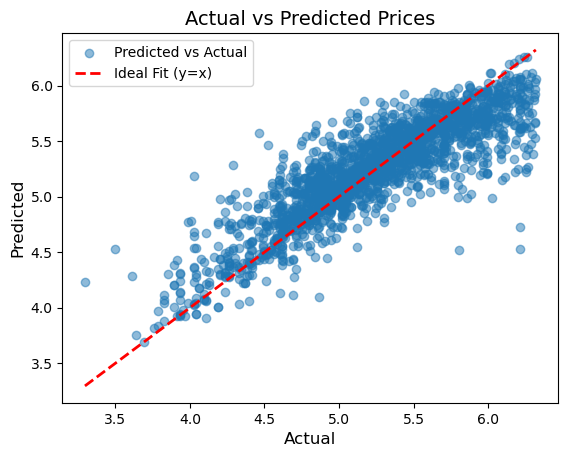

In [ ]:
# scatter plot
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y=x)')

plt.xlabel("Actual", fontsize=12)
plt.ylabel("Predicted", fontsize=12)
plt.title("Actual vs Predicted Prices", fontsize=14)
plt.legend()
plt.show()

### **Analysis**

A scatter plot shows the relationship between the actual values and the predicted values of the model.

The points densely clustered near the diagonal indicate that the model's predictions closely match the actual values.
Some data points (those falling significantly above or below the diagonal) represent outliers, where the predictions deviate greatly from the actual values.

# **8. Conclusion**

## Key Achievements and Limitations

 Observing the feature importance from the trained Random Forest model and the scatter plot of predicted vs. actual prices, several key conclusions can be drawn:

**1. Room Type – Entire Home/Apartment**  

Properties classified as "Entire home/apt" have the strongest influence on higher booking prices. This is likely because they provide privacy and complete independence, making them more appealing to travelers.

**2. Location (Longitude and Latitude)**  

The precise geographical location of a property significantly impacts its booking price. Properties located in prime areas or tourist hotspots are more likely to command higher prices.

**3. Minimum Nights**  

A higher minimum stay requirement tends to lead to higher total costs, possibly reflecting properties catering to longer-term, higher-budget travelers.

**4. Host Activity**  

Hosts managing multiple listings or having more active properties (e.g., higher reviews per month) positively influence the price, as they might offer professional-grade accommodations.

**5. Availability**  

Properties available for a greater number of days per year tend to show moderate importance, possibly correlating to increased accessibility and revenue opportunities.

**6. Room Type – Shared Room**  

Properties offering shared rooms or smaller spaces have a lower impact on pricing, likely reflecting budget-oriented accommodations.

**7. Model Performance**  

The scatter plot demonstrates a strong positive correlation between actual and predicted prices, with most predictions closely following the ideal fit line. However, some variance and outliers indicate areas where the model could improve.

# Additonal Delivery

In [ ]:
# cleaned Dataset for this project
df_dummies.to_csv('cleaend_dataset.csv', index=False)